# Before procceding with datas let see what is the objective of our haberman dataset


# Objective

Objective-To predict whether the breast cancer patient will survive after 5 years based upon features like patient's age, year of treatment and the number of positive axillary lymph nodes.

In [1]:
# importing packages for later use
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Adding label to columns names
haberman = pd.read_csv('/home/ajay/Applied_course/Data/haberman.csv', names=['age', 'operation_year', 'axillary_nodes', 'survived_5_years'], header = None)

In [3]:
haberman.shape

(306, 4)

In [4]:
haberman.head(5)

,age,operation_year,axillary_nodes,survived_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                 306 non-null int64
operation_year      306 non-null int64
axillary_nodes      306 non-null int64
survived_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Observations-
There are four columns and here 1 and 0 zero in survived_5_year col rerpresent survived and not survived

In [6]:
# let descibe our informations properly 
print "No. of data point - ", haberman.shape[0]
print "No. of features-", haberman.shape[1]

No. of data point -  306
No. of features- 4


In [7]:
#Data point per class
print haberman["survived_5_years"].value_counts()

1    225
2     81
Name: survived_5_years, dtype: int64


In [8]:
haberman.describe()

,age,operation_year,axillary_nodes,survived_5_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


observations---
1. So patient age vary from 30 - 83
2. From mean of age we can say that most of women at a age of 52 have higher cahnces of breast cancer
3. After 5 yr of operation 225 people are alive and 81 people have died
4. Last most important point that our dataset is imbalaned that we can see clearly and since 73% of people belongs to survival class.

# Univariate Analysis

In [9]:
warnings.filterwarnings("ignore")
#modified the col for better understandings
haberman['survived_5_years'] = haberman['survived_5_years'].map({1:"yes", 2:"no"})
haberman['survived_5_years'] = haberman['survived_5_years'].astype('category')

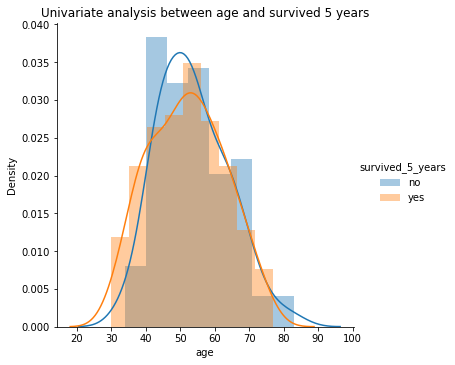

In [10]:
sn.FacetGrid(haberman, hue="survived_5_years", size=5) \
   .map(sn.distplot, "age") \
   .add_legend();
plt.title('Univariate analysis between age and survived 5 years')
plt.ylabel("Density")
plt.show();

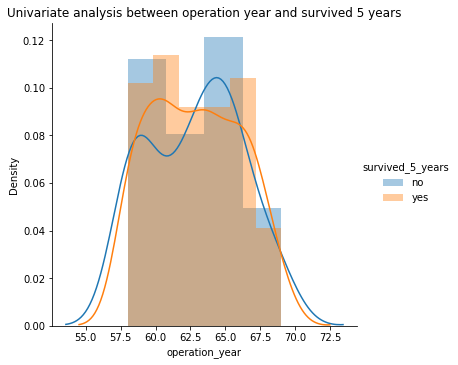

In [11]:
sn.FacetGrid(haberman, hue="survived_5_years", size=5) \
   .map(sn.distplot, "operation_year") \
   .add_legend();
plt.title('Univariate analysis between operation year and survived 5 years')
plt.ylabel("Density")
plt.show();

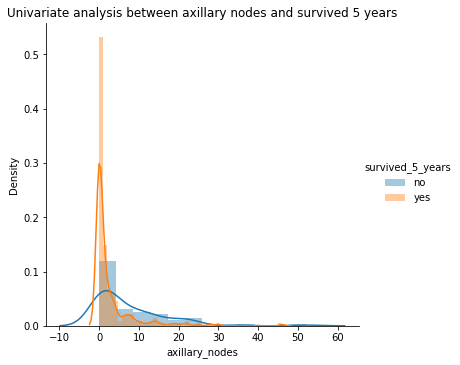

In [12]:
sn.FacetGrid(haberman, hue="survived_5_years", size=5) \
   .map(sn.distplot, "axillary_nodes") \
   .add_legend();
plt.title('Univariate analysis between axillary nodes and survived 5 years')
plt.ylabel("Density")
plt.show();

# PDF

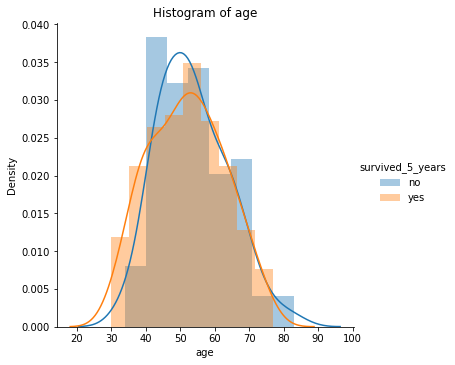

In [13]:
sn.FacetGrid(haberman, hue = "survived_5_years", size = 5).map(sn.distplot, "age").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

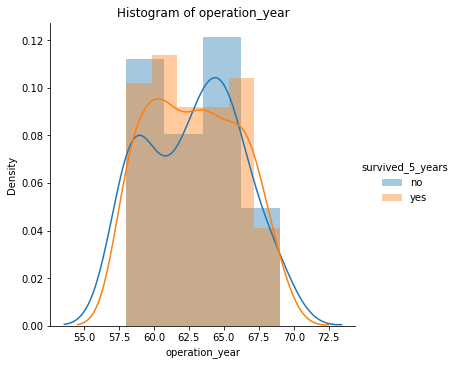

In [14]:
sn.FacetGrid(haberman, hue = "survived_5_years", size = 5). map(sn.distplot, "operation_year").add_legend()
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

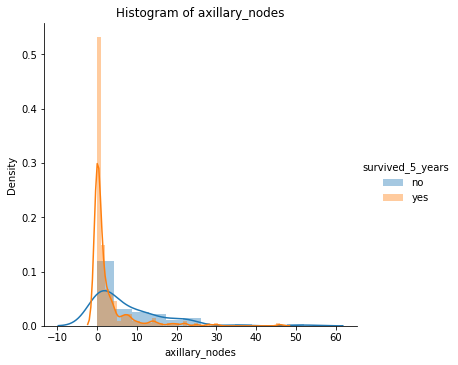

In [15]:
sn.FacetGrid(haberman, hue = "survived_5_years", size = 5).map(sn.distplot, "axillary_nodes").add_legend()
plt.title("Histogram of axillary_nodes")
plt.ylabel("Density")
plt.show()

Observations--
We can interpret from above plots that they are overlapping and by observing the axillary nodes we can say 58% of people have survived having 0-5 nodes.

# CDF

('\n', 'age', ':\n')
('bin width : ', array([30. , 34.7, 39.4, 44.1, 48.8, 53.5, 58.2, 62.9, 67.6, 72.3, 77. ]))
('CDF : ', array([0.05333333, 0.16      , 0.28444444, 0.37777778, 0.54222222,
       0.70666667, 0.8       , 0.91111111, 0.97333333, 1.        ]))
('\n', 'operation_year', ':\n')
('bin width : ', array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]))
('CDF : ', array([0.18666667, 0.29333333, 0.39555556, 0.46666667, 0.56444444,
       0.66666667, 0.73333333, 0.83111111, 0.92444444, 1.        ]))
('\n', 'axillary_nodes', ':\n')
('bin width : ', array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. , 27.6, 32.2, 36.8, 41.4, 46. ]))
('CDF : ', array([0.83555556, 0.91555556, 0.93777778, 0.96444444, 0.98222222,
       0.98666667, 0.99555556, 0.99555556, 0.99555556, 1.        ]))


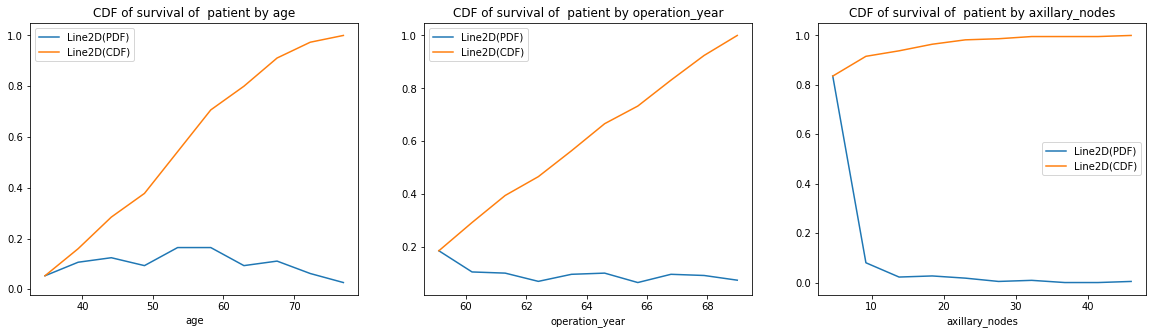

In [16]:
survived_yes = haberman.loc[haberman["survived_5_years"] == "yes"]; #storing the patient who survived
survived_no = haberman.loc[haberman["survived_5_years"] == "no"]; # storing the patient who are dead

# CDF plot for all features from list of survival of patients.
plt.figure(figsize=(20,5))
for x, feature in enumerate(list(haberman.columns[:-1])):
    plt.subplot(1, 3, x+1)
    counts, bin_edges = np.histogram(survived_yes[feature],\
                                     bins=10, density = True)
    pdf = counts/(sum(counts))
    print("\n",feature,":\n")
    print("bin width : ",bin_edges);
    cdf = np.cumsum(pdf)
    print("CDF : ",cdf);
    pdf, = plt.plot(bin_edges[1:],pdf,label='PDF')
    cdf, = plt.plot(bin_edges[1:], cdf,label='CDF')
    plt.xlabel(feature)
    plt.legend([pdf,cdf])
    plt.title('CDF of survival of  patient by '+feature)
plt.show()

('\n', 'age', ':\n')
('bin width : ', array([34. , 38.9, 43.8, 48.7, 53.6, 58.5, 63.4, 68.3, 73.2, 78.1, 83. ]))
('PDF : ', array([0.03703704, 0.12345679, 0.19753086, 0.19753086, 0.13580247,
       0.12345679, 0.09876543, 0.04938272, 0.02469136, 0.01234568]))
('CDF : ', array([0.03703704, 0.16049383, 0.35802469, 0.55555556, 0.69135802,
       0.81481481, 0.91358025, 0.96296296, 0.98765432, 1.        ]))
('\n', 'operation_year', ':\n')
('bin width : ', array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]))
('PDF : ', array([0.25925926, 0.04938272, 0.03703704, 0.08641975, 0.09876543,
       0.09876543, 0.16049383, 0.07407407, 0.04938272, 0.08641975]))
('CDF : ', array([0.25925926, 0.30864198, 0.34567901, 0.43209877, 0.5308642 ,
       0.62962963, 0.79012346, 0.86419753, 0.91358025, 1.        ]))
('\n', 'axillary_nodes', ':\n')
('bin width : ', array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]))
('PDF : ', array([0.56790123, 0.14814815, 0.1358024

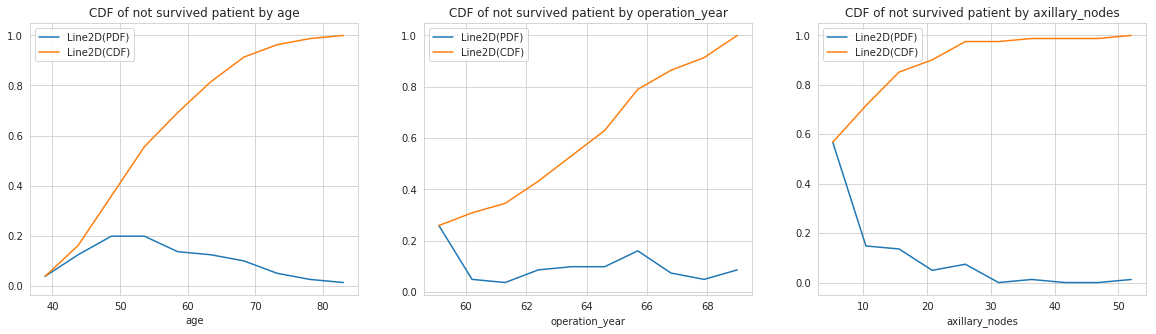

In [23]:
# CDF plot for all features from list of patienst who have died.
plt.figure(figsize=(20,5))
for x, feature in enumerate(list(haberman.columns[:-1])):
    plt.subplot(1, 3, x+1)
    counts, bin_edges = np.histogram(survived_no[feature],\
                                     bins=10, density = True)
    pdf = counts/(sum(counts))
    print("\n",feature,":\n")
    print("bin width : ",bin_edges);
    print("PDF : ",pdf);
    cdf = np.cumsum(pdf)
    print("CDF : ",cdf);
    pdf, = plt.plot(bin_edges[1:],pdf,label='PDF')
    cdf, = plt.plot(bin_edges[1:], cdf,label='CDF')
    plt.xlabel(feature)
    plt.legend([pdf, cdf])
    plt.title('CDF of not survived patient by '+feature)
plt.show()

# Box-plot

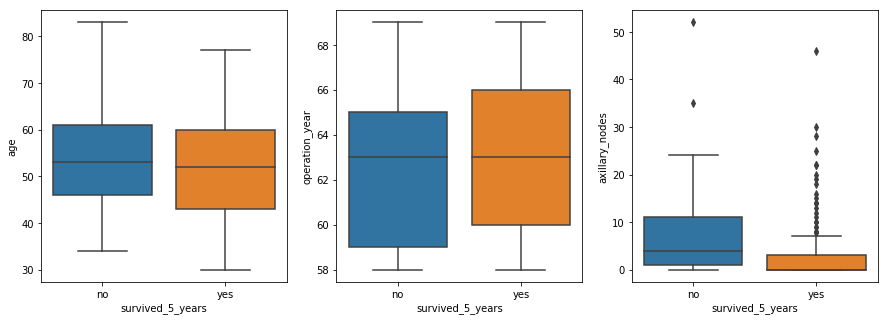

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for x, feature in enumerate(list(haberman.columns)[:-1]):
    sn.boxplot( x='survived_5_years', y=feature, data=haberman, ax=axes[x])
plt.show()

Observations:
    Box plot is better in explorating the datas it gives information in quartiles form and if point is outside the box then it is a outliers .
    So it is a easy way to plot data set

# Violin-Plot

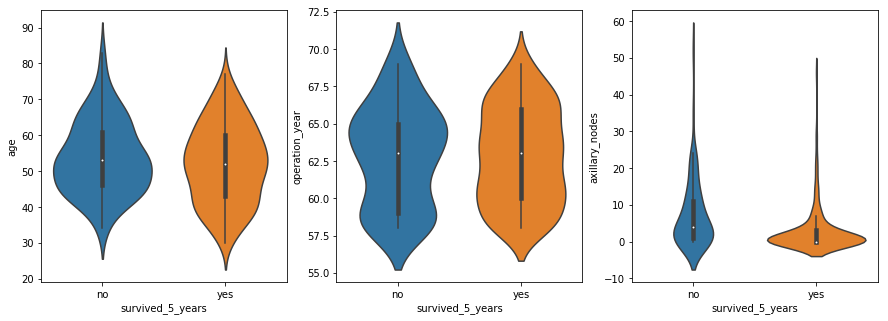

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for x, feature in enumerate(list(haberman.columns)[:-1]):
    sn.violinplot( x='survived_5_years', y=feature, data=haberman, ax=axes[x])
plt.show()

observations--
 Violin plots middle part it gives informations about median and it showcased full distributions of our dataset. It's give us combine info of boxplot and histogram

# Bi-variate analysis

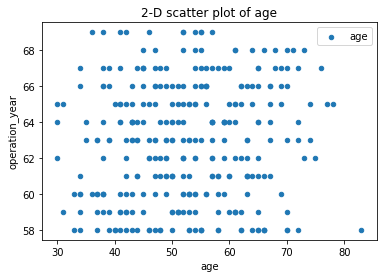

In [20]:
#2-D scatter plots
haberman.plot(kind = "scatter", x = "age", y = "operation_year")
plt.title("2-D scatter plot of age")
plt.legend(haberman)
plt.show()

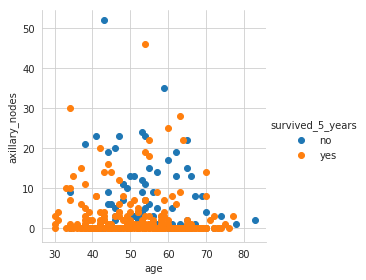

In [21]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sn.set_style("whitegrid");
sn.FacetGrid(haberman, hue="survived_5_years", size=4) \
   .map(plt.scatter, "age", "axillary_nodes") \
   .add_legend();
plt.show();

observations- From above plots we can see that 75% people are having axillary nodes between 0-5

# Pair Plot

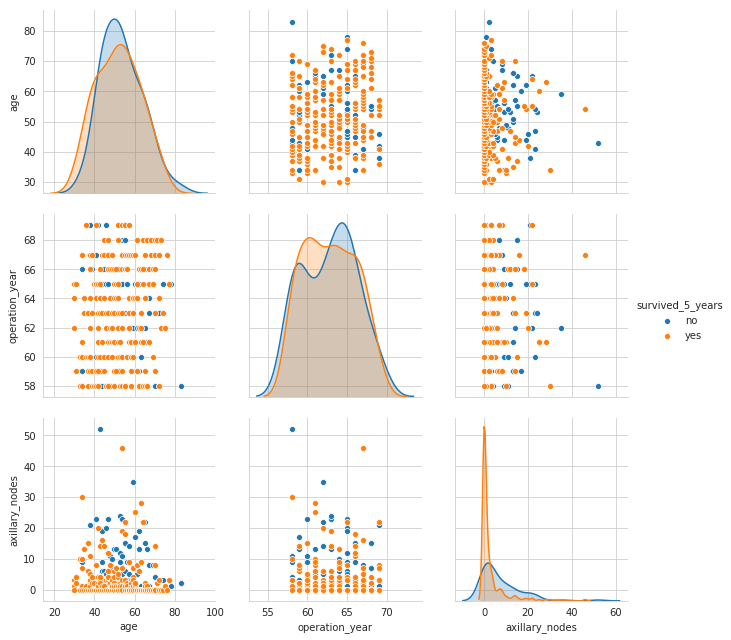

In [22]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sn.set_style("whitegrid");
sn.pairplot(haberman, hue="survived_5_years", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observations-
1. By observing the plot we can say that most of the year between 60-70 yr people have died.
2. By observing the plot we are unable to classify the features because of the overlapping behaviour



Conclusions-
1. First point of observations is that our dataset is imbalanced means that it doesn't contains equal number of people or data-point for class.
2. From features of point most of information is conved by axillary nodes since dataset is overlapping